In [1]:
#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

# Introducción

En el presente notebooks, vamos a realizar el preprocesamiento de los datos en detalle, para luego usar los dataframes resultantes en la realización de *Análisis Exploratorio de Datos* y *Aprendizaje Supervisado*

In [20]:
#Importamos el dataframe y verificamos las primeras filas

capital_df = pd.read_csv('properati_capital.csv')
capital_df.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,63934,MlnOILxnUwm3KXFnNyOJig==,Propiedad,2020-07-06,2021-04-07,2020-07-06,-34.618041,-58.475124,Argentina,Capital Federal,...,1.0,NaN,NaN,89000.0,USD,NaN,Galicia 2800 Depto 2 Ambientes Con Balcón Vill...,XINTEL(JUM-JUM-313) \n\nExcelente departament...,Departamento,Venta
1,660204,FiY707h094LvsqOGHohO9Q==,Propiedad,2020-07-17,9999-12-31,2020-07-17,-34.620686,-58.453972,Argentina,Capital Federal,...,2.0,NaN,NaN,190000.0,USD,NaN,DEPARTAMENTO A ESTRENAR AL FRENTE CON COCHERA,EXCELENTE DPTO A ESTRENAR AL FRENTE CON COCHER...,Departamento,Venta
2,961496,VKAgMtgXuRfeD2XHnLPWNQ==,Propiedad,2020-06-19,2020-12-03,2020-06-19,-34.590569,-58.425215,Argentina,Capital Federal,...,2.0,98.0,68.0,360000.0,USD,NaN,Excelente departamento 4 ambientes con terraza...,Patio El Salvador . inicio de obra nmarzo 2019...,Departamento,Venta
3,292569,H56oekWpzEOKT5aXM43WLA==,Propiedad,2021-02-24,2021-03-01,2021-02-24,-34.577440,-58.485041,Argentina,Capital Federal,...,1.0,118.0,96.0,285000.0,USD,NaN,Venta depto 4 ambientes/terraza en V. Urquiza,Corredor Responsable: MARIANO AUFSEHER - CPI 4...,Departamento,Venta
4,278737,FPPomZ4bizdYOzH9KlsLDg==,Propiedad,2020-11-17,2021-04-13,2020-11-17,-34.615851,-58.439566,Argentina,Capital Federal,...,1.0,61.0,52.0,145000.0,USD,NaN,Departamento de 2 ambientes c terraza a estrenar,Corredor Responsable: MARCELO GRUNBAUM - CMCPS...,Departamento,Venta


In [21]:
#Verificamos las dimensiones del dataframe

np.shape(capital_df)

(38656, 26)

In [22]:
#Analizamos las columnas del dataframe

capital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38656 entries, 0 to 38655
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       38656 non-null  int64  
 1   id               38656 non-null  object 
 2   ad_type          38656 non-null  object 
 3   start_date       38656 non-null  object 
 4   end_date         38656 non-null  object 
 5   created_on       38656 non-null  object 
 6   lat              36585 non-null  float64
 7   lon              36585 non-null  float64
 8   l1               38656 non-null  object 
 9   l2               38656 non-null  object 
 10  l3               38519 non-null  object 
 11  l4               1145 non-null   object 
 12  l5               0 non-null      float64
 13  l6               0 non-null      float64
 14  rooms            36095 non-null  float64
 15  bedrooms         31121 non-null  float64
 16  bathrooms        36320 non-null  float64
 17  surface_tota

In [23]:
#Imprimimos la cantidad de NANs que se encuentran en el dataframe, por columna

capital_df.isnull().sum()

Unnamed: 0             0
id                     0
ad_type                0
start_date             0
end_date               0
created_on             0
lat                 2071
lon                 2071
l1                     0
l2                     0
l3                   137
l4                 37511
l5                 38656
l6                 38656
rooms               2561
bedrooms            7535
bathrooms           2336
surface_total      16011
surface_covered    15978
price                  0
currency               0
price_period       38656
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

Podemos observar que las columnas **"l5", "l6" y "price_period"** están vacías.

Por otro lado sabemos que, por las características de las publicaciones que conforman los datos importados, las columnas **"adtype", "l1", "l2", "currency", "operation_type"** contienen la misma información para todas las instancias. **"Propiedad", "Argentina", "Capital Federal", "USD" y "Venta"**, respectivamente.

Por último, las columnas **"id", "title" y "description"** contienen información tipo texto que no nos aporta información relevante.

In [24]:
#Vamos a eliminar del dataframe todas las columnas mencionadas ya que no son relevantes para el análisis exploratorio

capital_df.drop(labels=['id','ad_type','start_date','end_date','l1','l2','l5','l6','currency','price_period','title','description','operation_type'], axis=1, inplace = True)
capital_df.head()

,Unnamed: 0,created_on,lat,lon,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,63934,2020-07-06,-34.618041,-58.475124,Villa del Parque,NaN,2.0,1.0,1.0,NaN,NaN,89000.0,Departamento
1,660204,2020-07-17,-34.620686,-58.453972,Caballito,NaN,3.0,2.0,2.0,NaN,NaN,190000.0,Departamento
2,961496,2020-06-19,-34.590569,-58.425215,Palermo,Palermo Soho,3.0,2.0,2.0,98.0,68.0,360000.0,Departamento
3,292569,2021-02-24,-34.577440,-58.485041,Villa Urquiza,NaN,4.0,4.0,1.0,118.0,96.0,285000.0,Departamento
4,278737,2020-11-17,-34.615851,-58.439566,Caballito,NaN,2.0,11.0,1.0,61.0,52.0,145000.0,Departamento


In [25]:
#Verificamos que se hayan elimando las columnas correctamente

np.shape(capital_df)

(38656, 13)

In [26]:
#Imprimimos nuevamente la cantidad de NANs por columna

capital_df.isnull().sum()

Unnamed: 0             0
created_on             0
lat                 2071
lon                 2071
l3                   137
l4                 37511
rooms               2561
bedrooms            7535
bathrooms           2336
surface_total      16011
surface_covered    15978
price                  0
property_type          0
dtype: int64

In [27]:
#Para las columnas "surface_total" y "surface_covered" que contienen algunas filas vacías, perder su información tendría un gran impacto para el análisis, por lo que llenamos los valores vacíos con la media de los valores de superficie.
#Por otro lado, la columna "rooms" que tiene el número de ambientes, va a ser completada con la mediana de todos sus valores.

capital_df['surface_total'].fillna(capital_df['surface_total'].mean(), inplace = True)
capital_df['surface_covered'].fillna(capital_df['surface_covered'].mean(), inplace = True)
capital_df['rooms'].fillna(capital_df['rooms'].median(), inplace = True)
capital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38656 entries, 0 to 38655
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       38656 non-null  int64  
 1   created_on       38656 non-null  object 
 2   lat              36585 non-null  float64
 3   lon              36585 non-null  float64
 4   l3               38519 non-null  object 
 5   l4               1145 non-null   object 
 6   rooms            38656 non-null  float64
 7   bedrooms         31121 non-null  float64
 8   bathrooms        36320 non-null  float64
 9   surface_total    38656 non-null  float64
 10  surface_covered  38656 non-null  float64
 11  price            38656 non-null  float64
 12  property_type    38656 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 3.8+ MB


In [28]:
#Nos aseguramos de que las columnas ya no cuenten con los nulos.

capital_df.isnull().sum()

Unnamed: 0             0
created_on             0
lat                 2071
lon                 2071
l3                   137
l4                 37511
rooms                  0
bedrooms            7535
bathrooms           2336
surface_total          0
surface_covered        0
price                  0
property_type          0
dtype: int64

In [29]:
#Ahora, vamos a averiguar si el dataframe cuenta con valores duplicados en la columna "Unnamed: 0" que es el código de identificación de la publicación. Si tiene un valor duplicado, quiere decir que la publicación está exactamente duplicada en todas sus columnas (no sugiere una actualización de precios por ejemplo)

capital_df.duplicated(subset = "Unnamed: 0", keep = 'last').sum()

8248

**Comentario:** Como podemos ver, hay *8248 publicaciones* duplicadas. Vamos a proceder a eliminarlas del dataframe para que no influya en el análisis.

In [30]:
#Ejecutamos drop_duplicates para eliminar los duplicados y verificamos que el contador devuelva 0.

capital_df.drop_duplicates(subset='Unnamed: 0', inplace=True, keep='last')
capital_df.duplicated(subset = "Unnamed: 0", keep = 'last').sum()

0

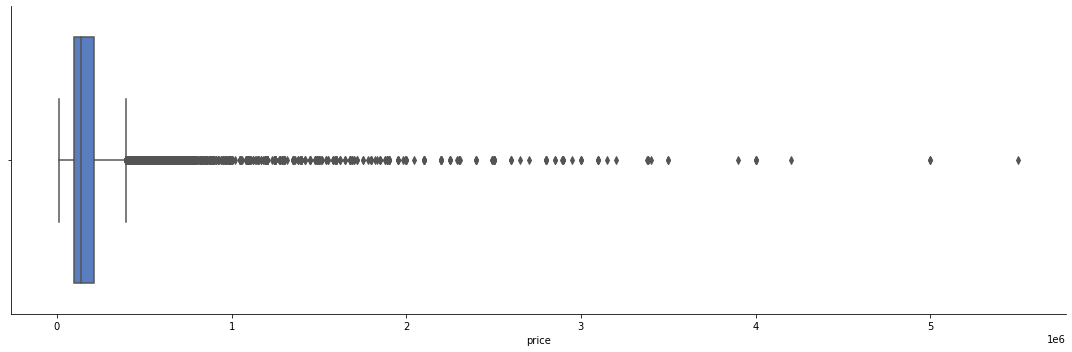

In [31]:
#Vamos a realizar un boxplot de la variable precio con el fin de identificar los outliers del conjunto de datos

sns.catplot(data=capital_df,
                x="price", 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)

**Comentario:** Como podemos observar, los datos cuentan con una gran cantidad de precios que parecieran ser altos. Sin embargo, vemos que hay una gran densidad de precios hasta aproximadamente *USD 350k*, por ende, vamos a mantener todos los valores por debajo de ese límite.

In [32]:
capital_df = capital_df.loc[capital_df.price < 350000]

In [33]:
#Para verificar, ponemos un contador a los valores superiores, esperando que devuelva 0.

capital_df[capital_df['price'] > 350000].count()

Unnamed: 0         0
created_on         0
lat                0
lon                0
l3                 0
l4                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

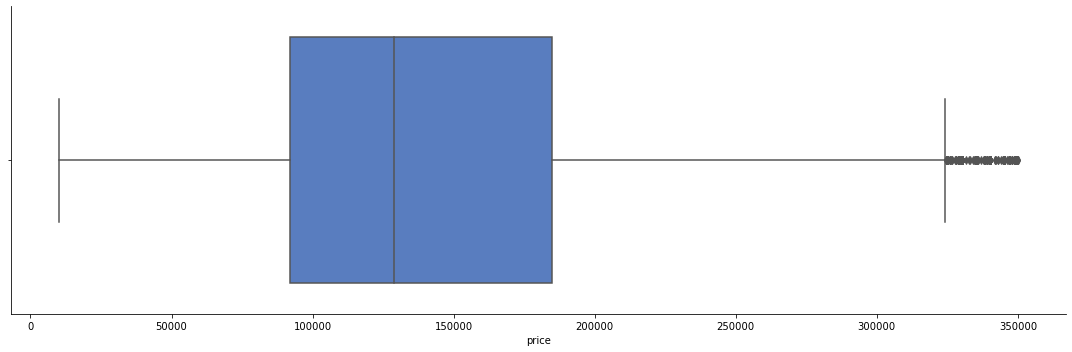

In [34]:
#Volvemos a realizar el boxplot

sns.catplot(data=capital_df,
                x="price", 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)

In [35]:
np.shape(capital_df)

(27493, 13)

**Comentario:** Observamos que la cantidad de Outliers se redujo considerablemente y aún mantenemos casi 27.500 samples.

---
**Hasta el momento** realizamos las manipulaciones para tener la información necesaria para todo el Análisis Exploratorio.

Vamos a proceder con algunas manipulaciones más que corresponden solamente a lo necesario para el Aprendizaje Supervisado.

In [36]:
#Eliminamos la columna de identificación de la publicación.
#También la columna l4 que desagrega aún más los barrios, pero únicamente para el barrio 'Palermo'
#Eliminamos latitud y longitud porque es información que tenemos disponible en las dummies del barrio.
#Eliminamos dormitorios y baños porque es información que tenemos en la variable 'rooms'

capital_df = capital_df.drop(['Unnamed: 0',"l4","created_on","lat","lon","bedrooms","bathrooms"], axis=1)

In [37]:
np.shape(capital_df)

(27493, 6)